<a href="https://colab.research.google.com/github/s23912/pad/blob/main/PAD_LAB_05_ZADANIE_DOMOWE_pawel_ungier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pawel Ungier
# s23912

#Dokonaj klasteryzacji danych z pliku z użyciem KMeans i DBSCAN:
#a)	Wyłącz ze zbioru kolumny A i B


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
path = '/content/drive/MyDrive/PAD/PAD_05/Zadanie_domowe/trumptweets_data.csv'
df = pd.read_csv(path, sep=';', decimal=',')
df = df.drop(columns= ['A','B'])
df.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,23,98.23,66.81,54.89,93.61,23.0,13.04,73.91,39.13,4.35,4.35,0.0,0.0,0.0,4.35,0.0,0.0,4.35,21.74,4.35,0.0,8.70,0.0,4.35,13.04,8.70,0.0,4.35,0.0,4.35,4.35,0.0,0.0,0.0,0.0,4.35,0.0,0.0,0.0,4.35,...,0.0,0.0,0.0,4.35,0.0,4.35,4.35,0.0,0.0,0.00,8.70,4.35,26.09,0.0,13.04,13.04,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.0,0.00,0.0,0.0,4.35,0.0,0.0,0.0,0.0,0.00
1,22,96.54,81.84,31.94,94.75,22.0,31.82,90.91,40.91,4.55,4.55,0.0,0.0,0.0,4.55,0.0,0.0,9.09,13.64,9.09,0.0,4.55,0.0,13.64,4.55,4.55,0.0,0.00,0.0,4.55,4.55,0.0,0.0,0.0,0.0,9.09,0.0,0.0,0.0,4.55,...,0.0,0.0,0.0,13.64,0.0,4.55,13.64,0.0,0.0,0.00,9.09,9.09,18.18,0.0,4.55,13.64,13.64,9.09,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,4.55,0.00,0.0,0.00,0.0,0.0,4.55,0.0,0.0,0.0,0.0,0.00
2,20,96.79,50.00,15.86,96.76,20.0,15.00,50.00,15.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,10.00,0.00,5.0,0.00,0.0,0.00,15.00,5.00,0.0,5.00,0.0,5.00,5.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,5.00,0.0,5.00,5.00,0.0,0.0,0.00,0.00,0.00,15.00,0.0,10.00,5.00,5.00,0.00,0.0,5.0,0.0,0.0,5.00,0.0,5.00,0.0,0.0,0.0,30.00,5.00,0.0,5.00,0.0,0.0,5.00,5.0,0.0,0.0,0.0,10.00
3,17,97.21,50.00,99.00,25.77,17.0,29.41,76.47,17.65,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,5.88,5.88,0.00,0.0,5.88,0.0,5.88,5.88,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,11.76,0.0,0.00,11.76,0.0,0.0,5.88,0.00,0.00,23.53,0.0,5.88,11.76,17.65,11.76,0.0,0.0,0.0,0.0,5.88,0.0,5.88,0.0,0.0,0.0,29.41,5.88,0.0,11.76,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.76
4,20,25.89,2.31,74.76,25.77,10.0,10.00,65.00,60.00,20.00,15.00,10.0,0.0,0.0,0.00,5.0,5.0,5.00,15.00,15.00,10.0,0.00,5.0,15.00,5.00,5.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,5.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,5.00,5.00,10.00,0.0,5.00,5.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,35.00,5.00,0.0,0.00,0.0,0.0,0.00,15.0,10.0,5.0,0.0,0.00


#b)	Znajdź optymalną liczbę K dla algorytmu K Means.

2 307075644.7
3 246706575.8
4 218237095.9
5 199555988.2
6 184460909.0
7 171702952.0
8 161605626.1
9 152682690.1
10 148023566.9
11 143593938.8
12 140216842.5
13 137146944.7
14 133720636.4
15 131229157.8


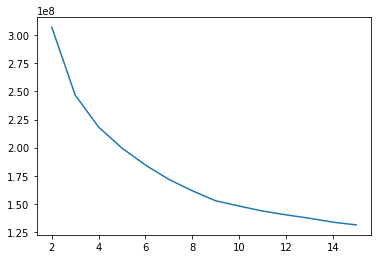

In [ ]:
inertias = []
for k in range(2,16):
    km= KMeans(k).fit(df)
    inertias.append(round(km.inertia_,1))
    print(k,round(km.inertia_,1))
plt.plot(list(range(2,16)),inertias)
plt.show()

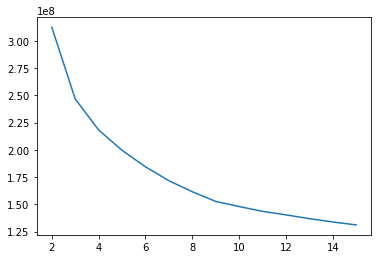

In [ ]:
plt.plot(list(range(2,16)),inertias)
plt.show()

In [ ]:
print('optymalna liczba klastrów możemy przyjać, że wynosi 10 bo widzimy, że wykres się wypłaszcza')

optymalna liczba klastrów możemy przyjać, że wynosi 10 bo widzimy, że wykres się wypłaszcza


#c)	Oblicz średnie zmiennych dla każdego klastra wg DBSCAN i KMeans

In [ ]:
#KMeans
km = KMeans(10).fit(df)
scoresKM = pd.DataFrame(km.cluster_centers_,columns=df.keys())
df['clusters'] = km.labels_

scoresKM['counts'] = df['clusters'].mean()
scoresKM

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,counts
0,16.111664,88.701306,69.291955,9.623084,21.927289,12.498665,35.805939,45.692012,15.732731,3.179321,2.244260,0.825663,0.449821,0.575775,3.149664e-01,7.800547e-02,0.935031,2.311012,6.322203,2.483380,9.839716e-01,7.776523e-01,4.117135e-01,5.675613,2.044805,6.332828e-01,2.951853e-01,4.210982,1.193275e+00,2.427839,0.493601,1.915568e+00,1.249963e-01,5.831858e-01,4.249465e-01,8.467719,1.095971e-01,1.307262e-01,2.813877e-01,4.993609e-01,...,6.571002e-02,1.075255e-01,10.411432,5.507210,0.934382,3.825456,0.430440,4.701940e-01,6.997588e-01,4.362984,0.573439,6.708030,1.071878,3.840395,1.899470,3.747816,5.686033,0.211694,6.775628e-01,0.167844,1.538299e-01,10.643273,1.360109e-01,10.170184,0.311920,4.984830e-02,1.343696e-02,74.381002,16.512922,1.570221,4.326339,0.0,0.599846,3.865148,5.641226,7.974815,1.687073e+00,2.245287e-01,31.977710,4.420223
1,24.848391,86.145058,73.053671,12.000444,95.527300,13.013692,23.467446,74.220257,39.641639,8.113939,5.661126,1.312276,1.279854,1.641259,1.002241e+00,4.256702e-01,2.452970,7.338425,12.477942,6.634063,2.710456e+00,3.003096e+00,6.939430e-01,12.651143,6.344288,1.895025e+00,6.993564e-01,1.890669,1.911965e+00,10.148643,9.493363,5.998981e-01,5.569531e-02,1.701461e-01,1.287555e-01,9.231876,2.167405e-01,2.600354e-01,3.480189e-01,1.247508e+00,...,4.882935e-02,1.407632e-01,12.319575,3.155204,2.821984,4.783818,3.766535,4.445881e-01,2.049128e+00,8.842530,1.443230,10.052167,1.261137,5.612845,3.427422,4.473739,1.898934,0.296023,1.281932e+00,0.343609,9.192058e-02,2.082510,3.096398e-02,1.758481,0.181360,1.127074e-01,6.132270e-03,30.244085,8.429015,2.929172,1.272045,0.0,0.267800,2.963801,1.511860,3.188784,1.112582e+00,4.161264e-01,8.153394,4.420223
2,19.738705,25.463032,25.873442,63.314686,84.431798,10.937774,22.628351,79.997019,48.862818,14.606069,9.804788,6.670512,0.474318,1.493414,6.731160e-01,4.933395e-01,4.799273,3.240205,7.132650,12.185906,7.109096e+00,5.531104e+00,4.822613e+00,20.435016,6.019595,1.795906e+00,1.404769e+00,1.165738,1.467154e+00,9.995431,9.003619,8.991244e-01,8.087564e-02,2.419702e-01,2.308337e-01,5.870666,8.133209e-02,9.843037e-02,1.696926e-01,7.088496e-01,...,8.320913e-02,1.122403e-01,8.742664,1.242678,2.190033,3.414080,3.506688,4.236702e-01,2.720913e+00,14.809418,2.642641,12.188328,1.841057,4.655417,6.050871,3.029106,0.953912,0.114080,1.054956e+00,0.156344,7.320447e-02,1.453046,6.988822e-02,0.664476,0.408221,2.671309e-01,4.927806e-02,41.638971,7.775352,3.638687,2.384150,0.0,0.535729,5.238249,2.023032,5.626395,3.671188e+00,4.991476e-01,10.247150,4.420223
3,22.270317,25.691952,68.680032,16.689713,14.705813,11.682906,21.964066,78.090069,49.685644,15.722210,10.255119,2.026474,1.754566,2.739175,2.394093e+00,1.341075e+00,5.465637,3.759846,7.121881,13.063719,6.405498e+00,5.519272e+00,3.284700e+00,20.223129,3.899167,1.342983e+00,2.434973e+00,1.165181,1.638350e+00,6.589343,1.613972,4.893362e+00,4.493855e-01,1.512691e+00,9.754683e-01,12.941484,1.407532e-01,1.777502e-01,6.099926e-01,2.140986e+00,...,7.265857e-02,1.615758e-01,9.298105,2.546648,1.649797,3.871373,1.207678,1.291098e+00,3.283878e+00,14.082589,1.813033,8.876910,1.398796,3.852413,3.875382,3.276410,0.732327,0.138000,1.115339e+00,0.223962,2.170119e-01,1.523551,3.276214e-01,0.899998,0.207302,6.006690e-02,1.657830e-02,35.945481,7.697837,3.157081,1.925312,0.0,1.260917,3.258764,1.872195,4.775689,3.019797e+00,6.056194e-01,8.372708,4.420223
4,22.015950,78.448830,49.759555,80.768536,17.890432,12.572014,22.621972,74.855778,40.9

In [ ]:
from sklearn.cluster import DBSCAN
#DBSCAN
db = DBSCAN(eps=0.5, min_samples = 20).fit(df)

In [ ]:
scoresDB = df
scoresDB['clusters']=db.labels_
scoresDB.groupby(['clusters']).mean()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,21.611342,69.890058,65.837445,29.267069,57.50883,12.199917,25.171136,70.822103,37.87897,9.325307,6.430599,1.959139,1.069603,1.909264,0.954455,0.53822,2.894134,5.159895,10.085976,7.489544,3.60566,3.156986,1.426049,13.930014,5.295687,1.59586,0.995896,2.294614,1.664229,8.286641,6.111823,2.121125,0.188527,0.642182,0.44698,9.141649,0.165903,0.18549,0.339833,1.065864,...,0.267659,0.068961,0.140045,10.548028,2.874682,1.956737,4.344726,2.414435,0.700063,2.176157,9.898137,1.662239,11.855954,1.604011,6.070419,4.475919,3.795534,1.87971,0.22082,1.095284,0.242098,0.153175,2.82743,0.117247,2.371049,0.239707,0.094668,0.012051,41.632839,9.31934,2.814557,2.212462,0.0,0.529927,4.066481,2.457602,4.84081,1.792825,0.445619,13.153236
0,1.000000,93.260000,50.000000,1.000000,25.77000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,0.00000,0.000000,0.000000,0.0,100.000000,0.000000,0.000000,0.00000,0.000000,0.000000,100.000000
1,2.000000,93.260000,50.000000,1.000000,99.00000,2.000000,50.000000,50.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.00000,0.000000,0.000000,0.0,0.000000,50.000000,0.000000,0.00000,0.000000,0.000000,50.000000
2,2.000000,93.260000,50.000000,1.000000,99.00000,2.000000,50.000000,50.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,50.000000,0.00000,0.000000,0.000000,0.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.00000,0.000000,0.000000,0.0,0.000000,50.000000,0.000000,0.00000,0.000000,0.000000,50.000000
3,3.000000,93.260000,50.000000,1.000000,99.00000,3.000000,33.330000,33.330000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.330000,0.000000,0.00000,0.000000,0.000000,0.000000,33.330000,33.330000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.330000,0.000000,0.000000,0.